# import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import json
import os

# Data Set Load

In [2]:
path = 'c:/research_persona/sentiment_analysis/movie_review_sentiment'

df = pd.read_csv(path + '/raw_data_nsmc.csv')

In [3]:
df.head()

,author,date,movie_id,rating,review,review_id,year,class
0,dhrl****,15.08.25,10001,10,전체관람가는 아닌것 같아요,10275182,15,POS
1,yuns****,15.08.25,10001,10,디렉터스컷으로봐서 거의 3시간짜리인데 참 흡인력있다,10272934,15,POS
2,supe****,15.08.23,10001,10,태어나 처음으로 가슴아리는 영화였다. 20년이상 지났지만.. 생각하면 또 가슴이...,10265507,15,POS
3,clai****,15.08.14,10001,10,어린시절 고딩때 봤던 때랑 또 결혼하고 나서 봤을때의 느낌은 확실히 다르네요. 뭔가...,10228406,15,POS
4,dlag****,15.08.11,10001,10,토토에게 넓은 세상을 보여주고픈 알프레도.. 그가 토토를 위해 정을 떼려고 했던 장...,10216349,15,POS


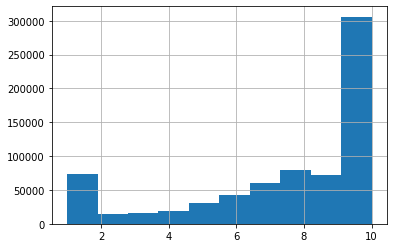

In [4]:
df['rating'].hist()

In [5]:
d_path = 'd:/naver_review/'
review_folder = os.listdir(d_path)

t = {}
for ix, review_file in enumerate(review_folder):
    with open(d_path + review_file, 'rb') as f:
        t[ix] = json.load(f)

In [6]:
t.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7])

In [7]:
t1 = pd.DataFrame.from_dict(t[0])
t2 = pd.DataFrame.from_dict(t[1])
t3 = pd.DataFrame.from_dict(t[2])
t4 = pd.DataFrame.from_dict(t[3])
t5 = pd.DataFrame.from_dict(t[4])
t6 = pd.DataFrame.from_dict(t[5])

In [8]:
t1.shape, t2.shape, t3.shape, t4.shape, t5.shape, t6.shape

((336938, 10),
 (337740, 10),
 (337081, 10),
 (339721, 10),
 (839385, 10),
 (341550, 10))

In [9]:
336938 + 337740 + 337081 + 339721+ 839385 + 341550

2532415

In [10]:
a = pd.concat((t1, t2, t3, t4, t5, t6))

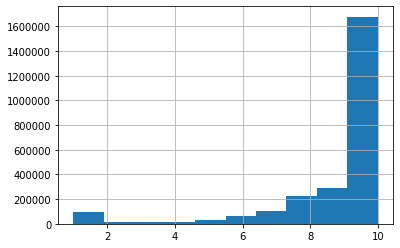

In [11]:
a['point'].hist()

In [12]:
del t, t1, t2, t3, t4, t5, t6

In [13]:
import re
re.sub(r'관람객\n\n', '', '관람객\n\n인권의 대지로 건너가는 징검다리의 돌 하나같은 영화')

'인권의 대지로 건너가는 징검다리의 돌 하나같은 영화'

In [14]:
a['review'] = a['review'].map(lambda x : re.sub(r'관람객\n\n', '', x))

# 감정 사전 로드

In [70]:
def read_sentiwordnet(filename, encoding='utf-8', col_ind=None):
    with open(filename, 'r', encoding=encoding) as f:
        d = f.readlines()
        d = [i.split('\t') for i in d]
        columns = ['POS', 'ID', 'PosScore', 'NegScore', 'SynsetTerms', 'Gloss']
        if col_ind:
            columns = ['POS', 'ID', 'SynsetTerms']
        swn = pd.DataFrame(data=d[1:-1], columns=columns)
    return swn

In [89]:
from ksenticnet_kaist import *

ksenticnet = get_ksenticnet()
sentiwordknu = pd.read_excel('../감정단어사전0603.xlsx')
swn_raw = read_sentiwordnet('SentiWordNet_3.0.0.txt')
swn_translated = read_sentiwordnet('SentiWordNet_3.0.0_only_word.txt', encoding='utf-16', col_ind=True)
swn = pd.concat((swn_raw, swn_translated['SynsetTerms']), axis=1)

In [92]:
df['review'].map(lambda x : x.split(' '))

0                                        [전체관람가는, 아닌것, 같아요]
1                        [디렉터스컷으로봐서, 거의, 3시간짜리인데, 참, 흡인력있다]
2         [태어나, 처음으로, 가슴아리는, 영화였다., , 20년이상, 지났지만.., 생각하...
3         [어린시절, 고딩때, 봤던, 때랑, 또, 결혼하고, 나서, 봤을때의, 느낌은, 확실...
4         [토토에게, 넓은, 세상을, 보여주고픈, 알프레도.., 그가, 토토를, 위해, 정을...
5              [인생, 최고의, 영화., 말이, 필요없음., 감독판은, 감동이, 좀, 덜함.]
6              [아름다운, 영화, 지금까지, 봤던, 영화, 중, 끝까지, 감동적이었던, 영화]
7                                        [전율과, 여운이, 남는, 영화]
8         [여지껏, 내인생에서, 젤, 감동인, 영화~!, , , 영화음악의, 거장, '엔리오...
9         [내가, 죽을때까지, 이런, 명작은, 나오기, 힘들것, 같다.., 너무, 아름답고,...
10        [내인생, 최고의, 영화!!, 아직까지, 이, 영화를, 봤을때의, 감동을, 잊을수,...
11        [음악을, 들으면, 자동으로, 연상이, 되는, 정말, 최고의, 영화..감수성을, 자...
12        [추억은, 방울방울, 추억을, 먹고, 사는, 나이가, 되니, 이, 영화가, 눈물나도...
13        [이, 영화에서, 나의, 향수를, 느꼈다., 알베르토와, 토토가, 함께, 자전거를,...
14                     [정말, 잘, 만든, 영화입니다., 몇, 번을, 봐도, 그대로.]
15                            [나이를, 먹고, 보니, 또, 다른, 맛이, 난다.]
16                 [영화, 자체에, 대한, 순수한, 꿈,

In [94]:
a['review']

0          감동입니다.. 말이 필요 없습니다 꼭 보세요그리고 상영관을 늘려 주심 감사하겠습니다^^
1                                          쩌네요 장관이구요 걸경입니다.
2         우리민족이 북한이 말하는 지상낙원이 아니라 생지옥, 생감옥에  지금 이시간에도 그곳...
3              북한의 현실을 보여주는 영화입니다.. 정말 이런 영화가 많이 배급되어야 합니다!
4         많이 울었습니다..화도나고 속상하고.. 북한의 현실을 나라꼭대기에 앉아있는 그분과 ...
5                                          모든 국민이 다 봐야되는 영화
6         북한의 실상에 대해 더 절실히 알게되는 영화였습니다. 귀한 영화 만들어 주셔서 감사...
7         북한의 실상을 보여주는..가슴아픈 영화였습니다. 하루빨리 북한에도 진정한 자유가 주...
8                                            이건 꼭 봐야할 영화입니다
9         현실은 우리를 행동하게만드다..영화를 보는 내내 정말 현실이지않기를 바랬던 유일한 ...
10                                       최고의영화 다들 꼭봐야할영화입니다
11                                            진짜 꼭봐야될 영화입니다
12        북한 신봉하는  놈들아 제발 정신좀 차리길 자본주의에서 누릴거 다 누려놓고 북한 빠...
13                                 자유민주주의를 위하여, 북한의 인권을 위하여
14         적어도 만명 돌파는 가야합니다. 상영관 멀어서 못가시는 분들은 좌파들처럼 영혼보냅시다.
15                                          재인이가 이영화를 싫어합니다
16        실화를 바탕으로 제작한 영화, 대한민국 국민 모두가 꼭